# Lista 01 - Prof. Dr. Leandro Ferreira


## 01

1 - O arquivo claims.csv contém uma amostra aleatória de 996 apólices de seguros de veículos referente ao período 2004-2005. As variáveis do arquivo estão na seguinte ordem : (i) valorv (valor do veículo em 10000 dolares australianos), (ii) expos (exposição do veículo), (iii) nsinistros (número de sinistros no período), (iv) csinistros (custo total dos sinistros em dolares australianos), (v) tipov (tipo do veículo em 11 categorias), (vi) idadev (idade do veículo em 4 categorias), (vii) sexoc (sexo do condutor principal), (viii) areac (área de residência do condutor principal) e (ix) idadec (idade do condutor principal em 6 categorias).

Faça uma análise descritiva dos dados e procure agrupar em um número menor de categorias algumas variáveis categóricas. Considere como variável resposta (target) cmsinistros = csinistros/nsinistros.

a) Qual é a relação da variável cmsinistros com sexo? Algum sexo é maior em média? Você consegue defender seu argumento utilizando as tecnicas que estudou?

b) Estude cmsinistros em relação a idade do condutor. Sua impressão muda se adicionarmos a variável sexo?

c) Existe uma relação clara de aumento de risco cmsinistros em relação ao valor do veículo?

d) Faça uma amostra -Aleatória simples (200) -Estratificada (100 do sexo Masculino e 100 do sexo feminino)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/julio-monzem/estatistica-aplicada/refs/heads/main/claims.csv'

dados = pd.read_csv(url, delimiter=';', decimal=',')

dados['cmsinistros'] = dados.csinistros / dados.nsinistros

dados.head()


,valorv,expos,nsinistros,csinistros,tipov,idadev,sexoc,areac,idadec,cmsinistros
0,1.66,0.484600,1,669.509999,SEDAN,3,M,B,6,669.509999
1,1.51,0.993840,1,806.609999,SEDAN,3,F,F,4,806.609999
2,0.76,0.539357,1,401.805451,HBACK,3,M,C,4,401.805451
3,1.89,0.654346,2,1811.709997,STNWG,3,M,F,2,905.854999
4,4.06,0.851472,1,5434.439987,STNWG,2,M,F,3,5434.439987


In [2]:
dados['tipov'].value_counts()

,count
tipov,
SEDAN,314
HBACK,272
STNWG,268
UTE,58
TRUCK,28
HDTOP,23
PANVN,11
COUPE,11
MIBUS,6


In [6]:
# com base no enunciado procurei agrupar em um número menor de categorias

categorias_mantidas = ['SEDAN', 'HBACK', 'STNWG']

dados['tipov'] = dados['tipov'].apply(lambda x: x if x in categorias_mantidas else 'OUTROS')

dados['tipov'].value_counts()

,count
tipov,
SEDAN,314
HBACK,272
STNWG,268
OUTROS,142


### Resolução 01 - A

In [10]:
# a

dados.groupby('sexoc')['cmsinistros'].mean().sort_values(ascending=0)

,cmsinistros
sexoc,
M,1847.837336
F,1643.213070


**A partir de uma análise preliminar é possível identificar que o sexo masculino tem um custo médio de sinistro maior**

### Resolução 01 - B

In [ ]:
# b

dados.groupby('idadec')['cmsinistros'].mean().sort_values(ascending=0)

,cmsinistros
idadec,
1,2269.896792
6,2218.380752
2,2038.275348
3,1522.014118
5,1500.364602
4,1354.427201


In [ ]:
# b

dados.groupby(['idadec', 'sexoc'])['cmsinistros'].mean().sort_values(ascending=0)

idadec  sexoc
1       M        3088.086792
6       M        2248.099485
        F        2187.970886
2       F        2161.324213
        M        1854.443310
1       F        1703.457561
3       M        1660.891381
5       M        1581.152216
4       M        1444.223787
5       F        1425.187239
3       F        1420.526888
4       F        1290.286782
Name: cmsinistros, dtype: float64

Ao realizar um análise em conjunto das variáveis 'SEXO' e 'IDADE' é possível perceber que ainda assim o sexo masculino apresenta custo médio maior.

Porém o sexo feminino com classicação 2 na variável 'IDADE' também um apresenta um custo médio elevado. Maior do que se analisado apenas com a média anterior onde foi utlizado apenas a variável 'SEXO'.

### Resolução 01 - C

In [5]:
# c

dados.groupby('tipov')['valorv'].mean().sort_values(ascending=0)

,valorv
tipov,
STNWG,2.732235
Outros,2.116500
SEDAN,1.533650
HBACK,1.238822


In [7]:
# c

dados.groupby('tipov')['cmsinistros'].mean().sort_values(ascending=0)

,cmsinistros
tipov,
OUTROS,2213.959534
HBACK,1751.727786
STNWG,1723.952774
SEDAN,1501.759468


<Axes: xlabel='valorv', ylabel='cmsinistros'>

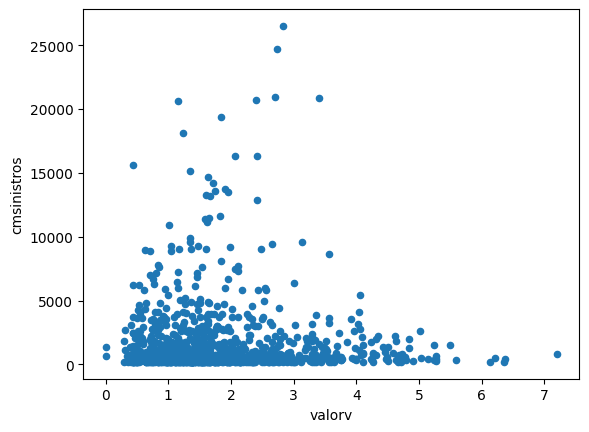

In [14]:
dados.plot.scatter('valorv', 'cmsinistros')

**A partir de uma análise preliminar, as duas variáveis não apresentam uma relação clara.**

### Resolução 01 - D

In [8]:
# d

amostra_simples = dados.sample(200)
amostra_simples

,valorv,expos,nsinistros,csinistros,tipov,idadev,sexoc,areac,idadec,cmsinistros
353,0.63,0.818617,1,8971.779999,OUTROS,4,M,B,3,8971.779999
660,2.42,0.501027,1,389.950000,OUTROS,3,M,B,2,389.950000
408,0.65,0.188912,1,4781.250885,OUTROS,4,F,C,3,4781.250885
214,0.84,0.164271,1,7796.369995,HBACK,3,F,C,2,7796.369995
717,3.28,0.446270,1,389.950000,STNWG,1,F,F,1,389.950000
...,...,...,...,...,...,...,...,...,...,...
20,4.46,0.191650,1,989.919998,OUTROS,2,M,B,2,989.919998
259,1.65,0.605065,1,4795.489990,SEDAN,2,F,B,3,4795.489990
531,1.98,0.268309,1,600.690000,SEDAN,2,M,C,4,600.690000
438,1.47,0.525667,1,2031.079998,SEDAN,3,F,A,1,2031.079998


In [9]:
_, amostra = train_test_split(dados, stratify=dados['sexoc'])
amostra['sexoc'].value_counts()

,count
sexoc,
F,142
M,107


## 02

2 - Para esse exercício será utilizado os dados referentes a um estudo de caso-controle realizado no Setor de Anatomia e Patologia do Hospital Heliópolis em São Paulo, no período de 1970 a 1982 (canc3.csv). Um total de 175 pacientes com processo infecioso pulmonar atendido no hospital no período acima foi classificado segundo as seguintes variáveis: tipo, tipo de tumor (1: maligno, 0: benigno); IDADE, idade em anos; SEXO (0:masculino, 1: feminino); HL, intensidade da célula histócitos-linfócitos (1:ausente, 2: discreta, 3: moderada, 4: intensa) e FF, intensidade da célula fibrose-frouxa (1:ausente, 2: discreta, 3: moderada, 4: intensa).

a) Faça uma análise descritiva das variáveis do problema.

b) Existe alguma variável que chama atenção em relação ao tipo de tumor? (Dica: Cruze as variáveis em relação ao tipo de tumor).

In [16]:
import pandas as pd

url = 'https://raw.githubusercontent.com/julio-monzem/estatistica-aplicada/refs/heads/main/canc3.csv'

dados = pd.read_csv(url, delimiter=';')

dados.head()

,tipo,idade,sexo,hl,ff
0,0,26,1,3,1
1,0,21,1,3,1
2,0,45,1,3,3
3,0,19,2,4,3
4,0,16,2,4,3


### Resolução 02 - A

In [17]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   tipo    175 non-null    int64
 1   idade   175 non-null    int64
 2   sexo    175 non-null    int64
 3   hl      175 non-null    int64
 4   ff      175 non-null    int64
dtypes: int64(5)
memory usage: 7.0 KB


In [ ]:
dados[['sexo', 'tipo', 'hl', 'ff']] = dados[['sexo', 'tipo', 'hl', 'ff']].astype(str)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tipo    175 non-null    object
 1   idade   175 non-null    int64 
 2   sexo    175 non-null    object
 3   hl      175 non-null    object
 4   ff      175 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.0+ KB


In [ ]:
dados.describe()

,idade
count,175.000000
mean,47.702857
std,18.206439
min,15.000000
25%,30.000000
50%,50.000000
75%,61.000000
max,87.000000


### Resolução 02 - B

In [30]:
dados['tipo'].value_counts()

,count
tipo,
0,104
1,71


In [ ]:
dados.groupby('sexo')['tipo'].value_counts()

sexo  tipo
1     0       78
      1       48
2     0       26
      1       23
Name: count, dtype: int64

<Axes: >

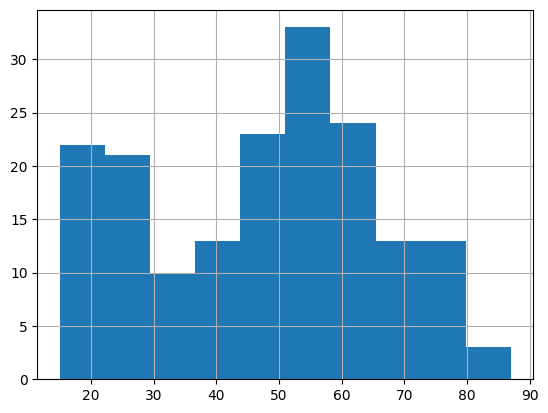

In [20]:
dados['idade'].hist()

In [31]:
dados.groupby('hl')['tipo'].value_counts()

hl  tipo
1   1        6
    0        2
2   1       43
    0       24
3   0       65
    1       21
4   0       13
    1        1
Name: count, dtype: int64

In [33]:
dados.groupby('ff')['tipo'].value_counts()

ff  tipo
1   1       45
    0       31
2   0       32
    1       14
3   0       39
    1       10
4   0        2
    1        2
Name: count, dtype: int64

## 03

3 - Cada amostra de ar tem 10% de chance de conter uma certa molécula rara. Considere que as amostras sejam independentes com relação à presença da molécula rara. Encontre a probabilidade de que em 18 amostras:

a) Exatamente 2 contenham a molécula rara.

b) No mínimo 4 amostras contenham a molécula rara.

c) De 3 a 7 amostras contenham a molécula rara.

d) O número médio e a variância de moléculas raras.

In [ ]:
from scipy.stats import binom

probabilidade = 0.10
n = 18

a = binom.pmf(2, n, probabilidade)
print(a)

b = 1 - binom.cdf(3, n, probabilidade)
print(b)

c = binom.cdf(7, n, probabilidade) - binom.cdf(2, n, probabilidade)
print(c)

q = 1 - probabilidade
nro_medio = n * probabilidade
variancia = n * probabilidade * q

d = (nro_medio, variancia)
print(d)

0.2835120888943317
0.0981968414254375
0.26603054787476754
(1.8, 1.62)
